In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [3]:
df='exam'

train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    df,
    image_size=(224,224),
    batch_size=32,
    seed=42,
    validation_split=0.3,
    subset='training')

full_val_ds=tf.keras.preprocessing.image_dataset_from_directory(
    df,
    image_size=(224,224),
    batch_size=32,
    seed=42,
    validation_split=0.3,
    subset='validation')

val_size=len(full_val_ds)//2

val_ds=full_val_ds.take(val_size)
test_ds=full_val_ds.skip(val_size)


Found 1000 files belonging to 2 classes.
Using 700 files for training.
Found 1000 files belonging to 2 classes.
Using 300 files for validation.


In [4]:
model=Sequential([
    Conv2D(32,(2,2),input_shape=(224,224,3),activation='relu'),
    MaxPooling2D((3,3)),
    Conv2D(64,(2,2),activation='relu'),
    MaxPooling2D((3,3)),
    Conv2D(128,(2,2),activation='relu'),
    MaxPooling2D((3,3)),
    Flatten(),

    Dense(1,activation='sigmoid')])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

C:\Users\DELL\tfenv310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 223, 223, 32)        │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 73, 73, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 23, 23, 128)         │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           6,273 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,841 (186.88 KB)

 Trainable params: 47,841 (186.88 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history=model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=7)

Epoch 1/7
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 374ms/step - accuracy: 0.4668 - loss: 16.7733 - val_accuracy: 0.5125 - val_loss: 0.9921
Epoch 2/7
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 361ms/step - accuracy: 0.4907 - loss: 1.1586 - val_accuracy: 0.5688 - val_loss: 0.7139
Epoch 3/7
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 337ms/step - accuracy: 0.5961 - loss: 0.6981 - val_accuracy: 0.5500 - val_loss: 0.7486
Epoch 4/7
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 359ms/step - accuracy: 0.6580 - loss: 0.5915 - val_accuracy: 0.5813 - val_loss: 0.7148
Epoch 5/7
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 343ms/step - accuracy: 0.7474 - loss: 0.5213 - val_accuracy: 0.6187 - val_loss: 0.7307
Epoch 6/7
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 346ms/step - accuracy: 0.7921 - loss: 0.4592 - val_accuracy: 0.6187 - val_loss: 0.7851
Epoch 7/7
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 328ms/step - accuracy: 0.8301 - loss: 0.4087 - val_accuracy: 0.6500 - val_loss: 0.7153


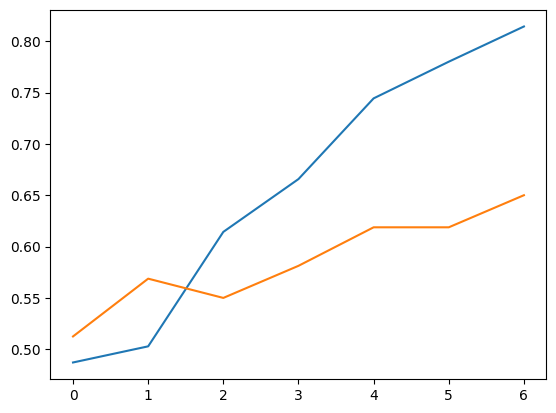

In [6]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
cat


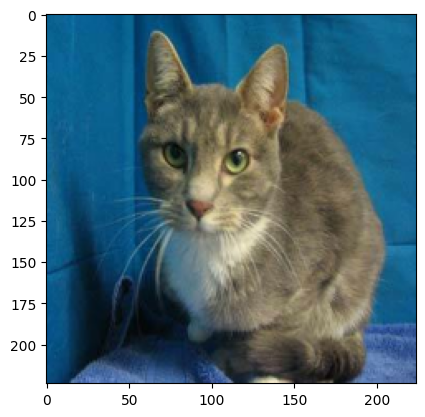

In [7]:
for images,labels in test_ds.take(1):
    single_img=images[0].numpy()

img_batch=np.expand_dims(single_img,axis=0)

pred=model.predict(img_batch)
predict_class='dog' if pred[0][0]>0.5 else 'cat'

print(predict_class)

plt.imshow(single_img.astype(np.uint8))